# Exploratory Data Analysis and Feature Engineering
Sumudu Tennakoon, PhD

To learn more about Python, refeer to the following websites

* Python : www.python.org

To learn more about the Python packages we explore in this notebook, refeer to the following websites

* NumPy : www.numpy.org
* Matplotlib : www.matplotlib.org
* Pandas : https://pandas.pydata.org
* Scikit-Learn : https://scikit-learn.org/
* Seaborn: https://seaborn.pydata.org/
* StatsModel : https://www.statsmodels.org

Dataset used in this tutorial
* Census Income Data (income_data.csv): http://archive.ics.uci.edu/ml/datasets/Census+Income

# 0. Load Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load Data

## Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read CSV file from a given path

In [3]:
# From URL (GitHub raw file link)
file_path_url= 'https://raw.githubusercontent.com/SumuduTennakoon/MLFoundations/main/Datasets/income_data.csv'

# From Colab Workspace (need to upload the file first. File will get deleted when this runtime is recycled)
file_path_ws = '/content/income_data.csv' 

# FromGoogle Drive
file_path_gd = '/content/drive/MyDrive/Classroom/Data Science Foundations/income_data.csv'

# Load CSV File
census_data = pd.read_csv(file_path_url)
census_data.head(5)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# 2. Inspecting Loaded Dataset

In [4]:
# Draw a random sample of rows
census_data.sample(5)

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
4675,4675,32,Private,164243,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,0.0,0.0,60.0,United-States,>50K
8882,8884,21,Private,376929,5th-6th,3,Never-married,Priv-house-serv,Not-in-family,White,Female,0.0,0.0,40.0,Mexico,<=50K
14743,14748,30,Private,59496,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K
1076,1076,27,Private,137645,Bachelors,13,Never-married,Sales,Not-in-family,Black,Female,0.0,1590.0,40.0,United-States,<=50K
5643,5645,34,Private,249948,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0.0,0.0,34.0,United-States,<=50K


In [5]:
# check width (number of columns) and height (number of rows)
census_data.shape

(41095, 16)

In [6]:
# Check Columns and thier Data Types
census_data.dtypes

Unnamed: 0          int64
age                 int64
workclass          object
fnlwgt              int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
class              object
dtype: object

In [7]:
# Check memory usage of each column in bytes
census_data.memory_usage()

Index                128
Unnamed: 0        328760
age               328760
workclass         328760
fnlwgt            328760
education         328760
education_num     328760
marital_status    328760
occupation        328760
relationship      328760
race              328760
sex               328760
capital_gain      328760
capital_loss      328760
hours_per_week    328760
native_country    328760
class             328760
dtype: int64

In [8]:
# Data Frame Info (Row count, Columns, Non-Null Count, Data Types)
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41095 entries, 0 to 41094
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      41095 non-null  int64  
 1   age             41095 non-null  int64  
 2   workclass       41095 non-null  object 
 3   fnlwgt          41095 non-null  int64  
 4   education       41095 non-null  object 
 5   education_num   41095 non-null  int64  
 6   marital_status  41095 non-null  object 
 7   occupation      41095 non-null  object 
 8   relationship    41095 non-null  object 
 9   race            41095 non-null  object 
 10  sex             41095 non-null  object 
 11  capital_gain    41094 non-null  float64
 12  capital_loss    41094 non-null  float64
 13  hours_per_week  41094 non-null  float64
 14  native_country  41094 non-null  object 
 15  class           41094 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 5.0+ MB


In [9]:
# Descriptive Statistics (all columns)
census_data.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,41095.0,NaN,NaN,NaN,10721.02594,6645.180596,0.0,5138.0,10275.0,15415.0,24833.0
age,41095.0,NaN,NaN,NaN,38.669425,13.748164,17.0,28.0,37.0,48.0,90.0
workclass,41095,9,Private,28451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,41095.0,NaN,NaN,NaN,189652.134737,105499.712269,12285.0,117587.0,178109.0,237563.5,1490400.0
education,41095,16,HS-grad,13345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_num,41095.0,NaN,NaN,NaN,10.079353,2.560906,1.0,9.0,10.0,12.0,16.0
marital_status,41095,7,Married-civ-spouse,18770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,41095,15,Prof-specialty,5193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,41095,6,Husband,16520,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,41095,5,White,35180,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Only numeric with customized percentiles
census_data.describe(percentiles=[.05, .1, .25, .5, .75, .9, .95]).transpose()

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
Unnamed: 0,41095.0,10721.025940,6645.180596,0.0,1027.7,2055.0,5138.0,10275.0,15415.0,20717.6,22778.3,24833.0
age,41095.0,38.669425,13.748164,17.0,19.0,22.0,28.0,37.0,48.0,58.0,64.0,90.0
fnlwgt,41095.0,189652.134737,105499.712269,12285.0,39588.8,66278.0,117587.0,178109.0,237563.5,328222.6,379398.7,1490400.0
education_num,41095.0,10.079353,2.560906,1.0,5.0,7.0,9.0,10.0,12.0,13.0,14.0,16.0
capital_gain,41094.0,1085.012581,7509.925734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4934.0,99999.0
capital_loss,41094.0,86.899134,401.668898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4356.0
hours_per_week,41094.0,40.404585,12.371882,1.0,18.0,24.0,40.0,40.0,45.0,55.0,60.0,99.0


In [11]:
# Get column names
census_data.columns

Index(['Unnamed: 0', 'age', 'workclass', 'fnlwgt', 'education',
       'education_num', 'marital_status', 'occupation', 'relationship', 'race',
       'sex', 'capital_gain', 'capital_loss', 'hours_per_week',
       'native_country', 'class'],
      dtype='object')

# 3. Drop Columns and Rows

In [12]:
# Need to drop the column 'Unnamed: 0'
# inplace=True (apply changes to the DataFrame object)
# axis = 1 indicates columns (0 indicate index or rows)
census_data.drop(labels='Unnamed: 0', axis=1, inplace=True)

# Use below if inplace=True or not provided the parameter
#census_data = census_data.drop(labels='Unnamed: 0', axis=1)

census_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [13]:
# Dropping a row (row with index 1 / second row)
# below code does not contain inplace. DataFrame object will not change but  return a copy of it.
# axis = 0 indicate index or rows

census_data.drop(labels=1, axis=0)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41090,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
41091,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
41092,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
41093,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


# 4. Quering Data

## Use query() function

In [14]:
# Get recods with age between 30 and 60 (ends are exclusive) 
# Returns a DataFrame with rows maching the logical expression
census_data.query(" age > 30 and age < 60")

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41089,33,Private,245211,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K.
41090,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
41092,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
41093,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.


## Create Subset of DataFrame macthing a condition

In [15]:
# Get records with age == 90
age_90_records = census_data.query("age==90")
age_90_records.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0.0,2206.0,40.0,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
1935,90,Private,221832,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,35.0,United-States,<=50K
2891,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0.0,0.0,40.0,Puerto-Rico,<=50K


In [16]:
# check result DataFrame size 
age_90_records.shape

(48, 15)

## Use DataFrame property loc[] 

In [17]:
age_90_records_2 = census_data.loc[census_data['age']==90]
age_90_records_2.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0.0,2206.0,40.0,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
1935,90,Private,221832,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,35.0,United-States,<=50K
2891,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0.0,0.0,40.0,Puerto-Rico,<=50K


In [18]:
# Without loc[]
age_90_records_3 = census_data[census_data['age']==90]
age_90_records_3.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
222,90,Private,51744,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0.0,2206.0,40.0,United-States,<=50K
1040,90,Private,137018,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K
1935,90,Private,221832,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,<=50K
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0.0,0.0,35.0,United-States,<=50K
2891,90,Private,171956,Some-college,10,Separated,Adm-clerical,Own-child,White,Female,0.0,0.0,40.0,Puerto-Rico,<=50K


## Run Logical Expressions with Columns


In [19]:
census_data['age']>30

0         True
1         True
2         True
3         True
4        False
         ...  
41090     True
41091     True
41092     True
41093     True
41094     True
Name: age, Length: 41095, dtype: bool

## Creating a New Column from the result of a Logical Expression

In [20]:
# creating column
census_data['is_age_gt_30'] = census_data['age']>30

# checking the result
census_data[['age','is_age_gt_30']].head()

,age,is_age_gt_30
0,39,True
1,50,True
2,38,True
3,53,True
4,28,False


# 5. Selecting Rows, Columns, Cells and Regions


In [21]:
# Data Frame
print(type(census_data))

<class 'pandas.core.frame.DataFrame'>


In [22]:
# Get column as a Series
a_selected_column = census_data['age']
print(type(a_selected_column))
a_selected_column.head()

<class 'pandas.core.series.Series'>


0    39
1    50
2    38
3    53
4    28
Name: age, dtype: int64

In [23]:
# Get column as a DatFrame
a_selected_column = census_data[['age']]
print(type(a_selected_column))
a_selected_column.head()

<class 'pandas.core.frame.DataFrame'>


,age
0,39
1,50
2,38
3,53
4,28


In [24]:
# Get a Subset of columns
columns_to_select = ['age', 'workclass', 'education']
census_data[columns_to_select]

,age,workclass,education
0,39,State-gov,Bachelors
1,50,Self-emp-not-inc,Bachelors
2,38,Private,HS-grad
3,53,Private,11th
4,28,Private,Bachelors
...,...,...,...
41090,39,Private,Bachelors
41091,64,?,HS-grad
41092,38,Private,Bachelors
41093,44,Private,Bachelors


## 5.1 Selcing Rows and Columns using loc[] and iloc[]
* loc[row_labels or boolean array, column_lables] 
* iloc[row_indices,column_indices]



## 5.1.1 Selecting Rows

In [25]:
# A Single row as a Series
# index of series become Column names
census_data.loc[1,:]

age                                50
workclass            Self-emp-not-inc
fnlwgt                          83311
education                   Bachelors
education_num                      13
marital_status     Married-civ-spouse
occupation            Exec-managerial
relationship                  Husband
race                            White
sex                              Male
capital_gain                      0.0
capital_loss                      0.0
hours_per_week                   13.0
native_country          United-States
class                           <=50K
is_age_gt_30                     True
Name: 1, dtype: object

In [26]:
# Single row as a DataFrame
census_data.loc[[1],:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,True


In [27]:
# A set of rows with given alist of labels
census_data.loc[[1, 3, 5, 7],:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,True
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K,True
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K,True


In [28]:
# Rows with  from 1 to 5, all columns (:)
census_data.loc[1:5,:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,True
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,True
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,False
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K,True


In [29]:
# iloc use integer positions of rows starting from 0 (first row)
# A set of rows with given a list of 
census_data.iloc[0,:]

age                           39
workclass              State-gov
fnlwgt                     77516
education              Bachelors
education_num                 13
marital_status     Never-married
occupation          Adm-clerical
relationship       Not-in-family
race                       White
sex                         Male
capital_gain              2174.0
capital_loss                 0.0
hours_per_week              40.0
native_country     United-States
class                      <=50K
is_age_gt_30                True
Name: 0, dtype: object

In [30]:
# list of row positions
census_data.iloc[[1, 3, 5, 7],:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,True
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,True
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0.0,0.0,40.0,United-States,<=50K,True
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K,True


In [31]:
# last row
census_data.iloc[[-1],:]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30
41094,35,Self-emp-inc,182148,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.,True


###  5.1.2 Select a Cell/Region

In [32]:
census_data.loc[1:3,['age', 'education']]

,age,education
1,50,Bachelors
2,38,HS-grad
3,53,11th


In [33]:
census_data.iloc[1:3,0:3]

,age,workclass,fnlwgt
1,50,Self-emp-not-inc,83311
2,38,Private,215646


In [34]:
# age from 8th row 
census_data.loc[7, 'age' ]

52

In [35]:
# 4th column from from 10th row 
census_data.iloc[9, 3]

' Bachelors'

###  5.1.3 Selecting Rows using boolean expressions

In [36]:
census_data.loc[census_data['hours_per_week']>40]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,45.0,United-States,>50K,True
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084.0,0.0,50.0,United-States,>50K,True
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0.0,0.0,80.0,United-States,>50K,True
13,32,Private,205019,Assoc-acdm,12,Never-married,Sales,Not-in-family,Black,Male,0.0,0.0,50.0,United-States,<=50K,True
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0.0,0.0,45.0,Mexico,<=50K,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41074,27,Private,430340,Some-college,10,Never-married,Sales,Not-in-family,White,Female,0.0,0.0,45.0,United-States,<=50K.,False
41075,40,Private,202168,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024.0,0.0,55.0,United-States,>50K.,True
41085,61,Private,89686,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0.0,0.0,48.0,United-States,<=50K.,True
41092,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.,True


###  5.1.4 Selecting Columns

In [37]:
# Returns a Column as a Series
# : indicates all rows
census_data.loc[:,'age'] 

0        39
1        50
2        38
3        53
4        28
         ..
41090    39
41091    64
41092    38
41093    44
41094    35
Name: age, Length: 41095, dtype: int64

In [38]:
# Returns a DataFrame with single column when list of columns provided
census_data.loc[:,['age']]

,age
0,39
1,50
2,38
3,53
4,28
...,...
41090,39
41091,64
41092,38
41093,44


In [39]:
# Select Set of Columns
census_data.loc[:,['age', 'workclass', 'education']]

,age,workclass,education
0,39,State-gov,Bachelors
1,50,Self-emp-not-inc,Bachelors
2,38,Private,HS-grad
3,53,Private,11th
4,28,Private,Bachelors
...,...,...,...
41090,39,Private,Bachelors
41091,64,?,HS-grad
41092,38,Private,Bachelors
41093,44,Private,Bachelors


In [40]:
#  iloc use integer positions of columns  starting from 0 (first column)
census_data.iloc[:,0]

0        39
1        50
2        38
3        53
4        28
         ..
41090    39
41091    64
41092    38
41093    44
41094    35
Name: age, Length: 41095, dtype: int64

In [41]:
# Columns with index 0, 2, 4
census_data.iloc[:,[0, 1, 3]]

,age,workclass,education
0,39,State-gov,Bachelors
1,50,Self-emp-not-inc,Bachelors
2,38,Private,HS-grad
3,53,Private,11th
4,28,Private,Bachelors
...,...,...,...
41090,39,Private,Bachelors
41091,64,?,HS-grad
41092,38,Private,Bachelors
41093,44,Private,Bachelors


In [42]:
# First 3 columns
census_data.iloc[:,0:3]

,age,workclass,fnlwgt
0,39,State-gov,77516
1,50,Self-emp-not-inc,83311
2,38,Private,215646
3,53,Private,234721
4,28,Private,338409
...,...,...,...
41090,39,Private,215419
41091,64,?,321403
41092,38,Private,374983
41093,44,Private,83891


In [43]:
# Last Column as a dataframe
census_data.iloc[:,[-1]]

,is_age_gt_30
0,True
1,True
2,True
3,True
4,False
...,...
41090,True
41091,True
41092,True
41093,True


### 5.1.5 Selecting Columns from records filtered using boolean expressions

In [44]:
census_data.loc[census_data['hours_per_week']>40, 'class']

7           >50K
8           >50K
10          >50K
13         <=50K
15         <=50K
          ...   
41074     <=50K.
41075      >50K.
41085     <=50K.
41092     <=50K.
41094      >50K.
Name: class, Length: 12036, dtype: object

## 5.2 Selcting columns based on the column name using filter()

In [45]:
# Select columns like 'edu'
# use like parameter 
census_data.filter(like='edu')

# use regex parameter to select columns start with 'edu'
census_data.filter(regex='^edu.*')

,education,education_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13
...,...,...
41090,Bachelors,13
41091,HS-grad,9
41092,Bachelors,13
41093,Bachelors,13


## 5.3 Select Columns based on Data Type string select_dtypes()

In [46]:
# Select columns with float data type
census_data.select_dtypes(include=['float64'])

,capital_gain,capital_loss,hours_per_week
0,2174.0,0.0,40.0
1,0.0,0.0,13.0
2,0.0,0.0,40.0
3,0.0,0.0,40.0
4,0.0,0.0,40.0
...,...,...,...
41090,0.0,0.0,36.0
41091,0.0,0.0,40.0
41092,0.0,0.0,50.0
41093,5455.0,0.0,40.0


In [47]:
# Select all columns except those with object data type
census_data.select_dtypes(exclude=['object'])

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,is_age_gt_30
0,39,77516,13,2174.0,0.0,40.0,True
1,50,83311,13,0.0,0.0,13.0,True
2,38,215646,9,0.0,0.0,40.0,True
3,53,234721,7,0.0,0.0,40.0,True
4,28,338409,13,0.0,0.0,40.0,False
...,...,...,...,...,...,...,...
41090,39,215419,13,0.0,0.0,36.0,True
41091,64,321403,9,0.0,0.0,40.0,True
41092,38,374983,13,0.0,0.0,50.0,True
41093,44,83891,13,5455.0,0.0,40.0,True


# 6. Change Column Data Types

In [48]:
census_data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education_num       int64
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
class              object
is_age_gt_30         bool
dtype: object

In [49]:
# integer to string
# must assign (no inplace)
print(census_data['education_num'].dtype)
census_data['education_num'] = census_data['education_num'].astype('str')
print(census_data['education_num'].dtype)

int64
object


In [50]:
print(census_data['education_num'].dtype)
census_data['education_num'] = census_data['education_num'].astype('int8')
print(census_data['education_num'].dtype)

object
int8


# 7. Detect Data Issues

## 7.1 Drop Rows with Missing Values

In [51]:
# Use isna() to get boolean column
census_data['class'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
41090    False
41091    False
41092    False
41093    False
41094    False
Name: class, Length: 41095, dtype: bool

In [52]:
# Get all rows with missing value in class columns
census_data.loc[census_data['class'].isna()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30
24818,25,Private,283515,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Mal,NaN,NaN,NaN,NaN,NaN,False


In [53]:
# NaN represents numpy.NaN
a = np.NaN
a

nan

In [54]:
# Drop rows with any value is missing. use inplace=True to change the DataFrame
census_data.dropna(how='any', axis=0, inplace=True)

In [55]:
# check if we still have missing values in  class olumn
census_data.loc[census_data['class'].isna()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30


In [56]:
# New size of teh DataFrame
census_data.shape

(41094, 16)

## 7.2 Strip (remove leading and training spaces) string values

In [57]:
# Get list of string columns 
census_data.select_dtypes(include='object').columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'class'],
      dtype='object')

In [58]:
# Check string values
census_data['class'].unique()

array([' <=50K', ' >50K', ' <=50K.', ' >50K.'], dtype=object)

In [59]:
census_data['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [60]:
# Use of vectorized string functions 
census_data['workclass'] = census_data['workclass'].str.strip()
census_data['education'] = census_data['education'].str.strip()
census_data['marital_status'] = census_data['marital_status'].str.strip()
census_data['occupation'] = census_data['occupation'].str.strip()
census_data['relationship'] = census_data['relationship'].str.strip()
census_data['race'] = census_data['race'].str.strip()
census_data['sex'] = census_data['sex'].str.strip()
census_data['native_country'] = census_data['native_country'].str.strip()
census_data['class'] = census_data['class'].str.strip()

## 7.3 Detect and Treat Data Entry Errors

In [61]:
# Check how many unique values presense in teh class column (target variable)
# expect 2 but have 4 unique values
census_data['class'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

### Replace Values (Method 1)

In [62]:
census_data.loc[census_data['class']=='<=50K.', 'class'] = '<=50K'
census_data.loc[census_data['class']=='>50K.', 'class'] = '>50K'

### Replace Values (Method 2/recomended)

In [63]:
census_data['class']=census_data['class'].replace('>50K.', '>50K')
census_data['class']=census_data['class'].replace('<=50K.', '<=50K')

In [64]:
# check values in column sex
census_data['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [65]:
census_data['sex'] = census_data['sex'].replace('Mal', 'Male')

## 7.4 Create Unique ID 

In [66]:
#  use index
census_data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            41085, 41086, 41087, 41088, 41089, 41090, 41091, 41092, 41093,
            41094],
           dtype='int64', length=41094)

In [67]:
census_data['ID'] = census_data.index+1
census_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,is_age_gt_30,ID
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,True,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,True,2
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,True,3
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,True,4
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,False,5


# 8. Optimizing Memory Usage

In [68]:
# Check memory usage of each column in bytes
memory_usage = census_data.memory_usage()/1024 # convert to KB
total_memory_usage = memory_usage.sum()
print(F"total memory usage:{total_memory_usage} KB")
memory_usage

total memory usage:5217.01171875 KB


Index             321.046875
age               321.046875
workclass         321.046875
fnlwgt            321.046875
education         321.046875
education_num      40.130859
marital_status    321.046875
occupation        321.046875
relationship      321.046875
race              321.046875
sex               321.046875
capital_gain      321.046875
capital_loss      321.046875
hours_per_week    321.046875
native_country    321.046875
class             321.046875
is_age_gt_30       40.130859
ID                321.046875
dtype: float64

In [69]:
census_data.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
education_num        int8
marital_status     object
occupation         object
relationship       object
race               object
sex                object
capital_gain      float64
capital_loss      float64
hours_per_week    float64
native_country     object
class              object
is_age_gt_30         bool
ID                  int64
dtype: object

## 8.1 Memory optimize numeric columns

In [70]:
census_data[['age', 'education_num', 'hours_per_week', 'capital_gain', 'capital_loss']].describe()

,age,education_num,hours_per_week,capital_gain,capital_loss
count,41094.000000,41094.000000,41094.000000,41094.000000,41094.000000
mean,38.669757,10.079355,40.404585,1085.012581,86.899134
std,13.748166,2.560937,12.371882,7509.925734,401.668898
min,17.000000,1.000000,1.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000,0.000000
75%,48.000000,12.000000,45.000000,0.000000,0.000000
max,90.000000,16.000000,99.000000,99999.000000,4356.000000


In [71]:
# Check min max values each numpy data type can take
print(np.iinfo(np.int8))
print(np.iinfo(np.int16))
print(np.iinfo(np.int32))
print(np.iinfo(np.int64))

print(np.finfo(np.float32))
print(np.finfo(np.float64))

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------

Machine parameters for int32
---------------------------------------------------------------
min = -2147483648
max = 2147483647
---------------------------------------------------------------

Machine parameters for int64
---------------------------------------------------------------
min = -9223372036854775808
max = 9223372036854775807
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minex

In [72]:
# downgrading numeric data types into a most suitable types
census_data['age'] = census_data['age'].astype('int8')
census_data['education_num'] = census_data['education_num'].astype('int8')
census_data['hours_per_week'] = census_data['hours_per_week'].astype('float32')
census_data['capital_gain'] = census_data['capital_gain'].astype('float32')
census_data['capital_loss'] = census_data['capital_loss'].astype('float32')

In [73]:
memory_usage = census_data.memory_usage()/1024 # convert to KB
total_memory_usage = memory_usage.sum()
print(F"total memory usage:{total_memory_usage} KB")
memory_usage

total memory usage:4454.525390625 KB


Index             321.046875
age                40.130859
workclass         321.046875
fnlwgt            321.046875
education         321.046875
education_num      40.130859
marital_status    321.046875
occupation        321.046875
relationship      321.046875
race              321.046875
sex               321.046875
capital_gain      160.523438
capital_loss      160.523438
hours_per_week    160.523438
native_country    321.046875
class             321.046875
is_age_gt_30       40.130859
ID                321.046875
dtype: float64

## 8.2 Memory optimize text columns

In [74]:
census_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'is_age_gt_30', 'ID'],
      dtype='object')

In [75]:
census_data[['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'class']].describe()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,class
count,41094,41094,41094,41094,41094,41094,41094,41094,41094
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,28450,13345,18770,5193,16520,35179,27446,36919,31297


In [76]:
print(census_data['workclass'].dtype)
census_data['workclass'] = census_data['workclass'].astype('category')
print(census_data['workclass'].dtype)
census_data['workclass']

object
category


0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
41090             Private
41091                   ?
41092             Private
41093             Private
41094        Self-emp-inc
Name: workclass, Length: 41094, dtype: category
Categories (9, object): ['?', 'Federal-gov', 'Local-gov', 'Never-worked', ...,
                         'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']

In [77]:
census_data['education'] = census_data['education'].astype('category')
census_data['marital_status'] = census_data['marital_status'].astype('category')
census_data['education'] = census_data['education'].astype('category')
census_data['occupation'] = census_data['occupation'].astype('category')
census_data['relationship'] = census_data['relationship'].astype('category')
census_data['race'] = census_data['race'].astype('category')
census_data['sex'] = census_data['sex'].astype('category')
census_data['native_country'] = census_data['native_country'].astype('category')

In [78]:
census_data.dtypes

age                   int8
workclass         category
fnlwgt               int64
education         category
education_num         int8
marital_status    category
occupation        category
relationship      category
race              category
sex               category
capital_gain       float32
capital_loss       float32
hours_per_week     float32
native_country    category
class               object
is_age_gt_30          bool
ID                   int64
dtype: object

In [79]:
memory_usage = census_data.memory_usage()/1024 # convert to KB
total_memory_usage = memory_usage.sum()
print(F"total memory usage:{total_memory_usage} KB")
memory_usage

total memory usage:2211.154296875 KB


Index             321.046875
age                40.130859
workclass          40.494141
fnlwgt            321.046875
education          40.798828
education_num      40.130859
marital_status     40.478516
occupation         40.791016
relationship       40.345703
race               40.337891
sex                40.251953
capital_gain      160.523438
capital_loss      160.523438
hours_per_week    160.523438
native_country     41.505859
class             321.046875
is_age_gt_30       40.130859
ID                321.046875
dtype: float64

# 9. Rearranging Columns

In [80]:
census_data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'is_age_gt_30', 'ID'],
      dtype='object')

In [81]:
census_data = census_data[['ID', 'age', 'workclass', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class']]

census_data.head()

,ID,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# 10. Save Processed File

In [82]:
# save as picke file (binary)
census_data.to_pickle('income_data_processed.pkl')

# Save as .csv
census_data.to_csv('income_data_processed.csv', index=False)

# 11. Descriptive Statistics For Numerical Columns
* mean
* median
* min/max
* std
* percentiles (25%, 50%, 75%)

## Descriptive stat using describe()

In [83]:
census_data.describe()

,ID,age,education_num,capital_gain,capital_loss,hours_per_week
count,41094.000000,41094.000000,41094.000000,41094.000000,41094.000000,41094.000000
mean,20547.896068,38.669757,10.079355,1085.010742,86.899132,40.404583
std,11863.374629,13.748166,2.560937,7509.538574,401.673126,12.371206
min,1.000000,17.000000,1.000000,0.000000,0.000000,1.000000
25%,10274.250000,28.000000,9.000000,0.000000,0.000000,40.000000
50%,20547.500000,37.000000,10.000000,0.000000,0.000000,40.000000
75%,30821.750000,48.000000,12.000000,0.000000,0.000000,45.000000
max,41095.000000,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [84]:
# single column
census_data['age'].describe()

count    41094.000000
mean        38.669757
std         13.748166
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

## Plot distributions

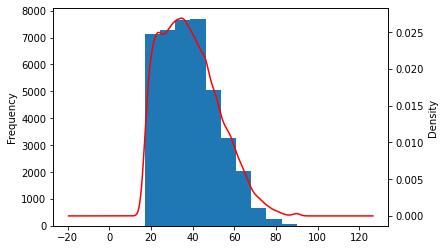

In [85]:
# using Pandas matplotlib
f,ax0 = plt.subplots()
ax1 = ax0.twinx()

census_data['age'].plot(kind='hist', bins=10, ax=ax0)
census_data['age'].plot(kind='kde', c='red', ax=ax1)

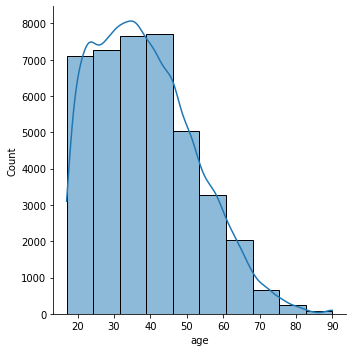

In [86]:
# using seaborn
sns.displot(kind='hist', x='age', data=census_data, bins=10, kde=True)

## Box plot

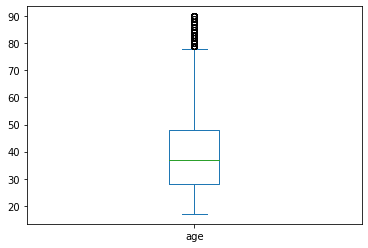

In [87]:
# Pandas matplotlib
census_data['age'].plot(kind='box')

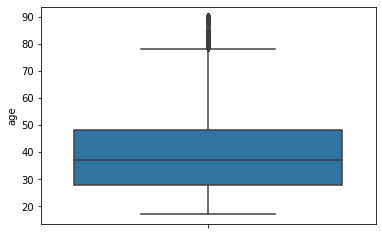

In [88]:
# Seaborn 
sns.boxplot(y="age", data=census_data)

# 12. Exploring Categorical Variables

In [89]:
census_data['education'].head()

0    Bachelors
1    Bachelors
2      HS-grad
3         11th
4    Bachelors
Name: education, dtype: category
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool',
                          'Prof-school', 'Some-college']

In [90]:
census_data['education'].describe()

count       41094
unique         16
top       HS-grad
freq        13345
Name: education, dtype: object

## Unique Values

In [91]:
# get unique values
edu_vals = census_data['education'].unique()
edu_vals

['Bachelors', 'HS-grad', '11th', 'Masters', '9th', ..., '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
Length: 16
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool',
                          'Prof-school', 'Some-college']

In [92]:
# get number of unique values
len(edu_vals)

16

In [93]:
# get number of unique values using nunique()
census_data['education'].nunique()

16

## Freqeuncy Table

In [94]:
# counts (frequencies)
edu_values = census_data['education'].value_counts()
edu_values

HS-grad         13345
Some-college     9137
Bachelors        6778
Masters          2231
Assoc-voc        1734
11th             1542
Assoc-acdm       1325
10th             1172
7th-8th           797
Prof-school       685
9th               628
12th              542
Doctorate         495
5th-6th           420
1st-4th           196
Preschool          67
Name: education, dtype: int64

In [95]:
# check data type of returend value
type(edu_values)

pandas.core.series.Series

In [96]:
print(edu_values.index)
print(edu_values.values)

CategoricalIndex(['HS-grad', 'Some-college', 'Bachelors', 'Masters',
                  'Assoc-voc', '11th', 'Assoc-acdm', '10th', '7th-8th',
                  'Prof-school', '9th', '12th', 'Doctorate', '5th-6th',
                  '1st-4th', 'Preschool'],
                 categories=['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', ...], ordered=False, dtype='category')
[13345  9137  6778  2231  1734  1542  1325  1172   797   685   628   542
   495   420   196    67]


In [97]:
# propotions instead of freqeuncies
census_data['education'].value_counts(normalize=True)

HS-grad         0.324743
Some-college    0.222344
Bachelors       0.164939
Masters         0.054290
Assoc-voc       0.042196
11th            0.037524
Assoc-acdm      0.032243
10th            0.028520
7th-8th         0.019395
Prof-school     0.016669
9th             0.015282
12th            0.013189
Doctorate       0.012046
5th-6th         0.010220
1st-4th         0.004770
Preschool       0.001630
Name: education, dtype: float64

# 13. Group By Aggregate Values

In [98]:
# get groups
census_data.groupby(by='education')

In [99]:
# Groupby Count
census_data.groupby(by='education')['ID'].count()

education
10th             1172
11th             1542
12th              542
1st-4th           196
5th-6th           420
7th-8th           797
9th               628
Assoc-acdm       1325
Assoc-voc        1734
Bachelors        6778
Doctorate         495
HS-grad         13345
Masters          2231
Preschool          67
Prof-school       685
Some-college     9137
Name: ID, dtype: int64

In [100]:
# Groupby Min
census_data.groupby(by='education')['age'].min()

education
10th            17
11th            17
12th            17
1st-4th         22
5th-6th         17
7th-8th         17
9th             17
Assoc-acdm      19
Assoc-voc       19
Bachelors       19
Doctorate       24
HS-grad         17
Masters         18
Preschool       19
Prof-school     25
Some-college    17
Name: age, dtype: int8

In [101]:
# max
census_data.groupby(by='education')['age'].max()

education
10th            90
11th            90
12th            81
1st-4th         90
5th-6th         84
7th-8th         90
9th             90
Assoc-acdm      90
Assoc-voc       84
Bachelors       90
Doctorate       80
HS-grad         90
Masters         90
Preschool       77
Prof-school     90
Some-college    90
Name: age, dtype: int8

In [102]:
# multiple statistics
census_data.groupby(by='education').agg({'age': ['min', 'max', 'mean', 'std', 'sum']})

age                                    
             min max       mean        std       sum
education                                           
10th          17  90  38.000000  16.961352   44536.0
11th          17  90  32.442931  15.312757   50027.0
12th          17  81  32.062731  14.735616   17378.0
1st-4th       22  90  47.984694  14.883988    9405.0
5th-6th       17  84  43.645238  15.536096   18331.0
7th-8th       17  90  49.392723  16.359194   39366.0
9th           17  90  41.179936  15.978388   25861.0
Assoc-acdm    19  90  37.957736  11.382250   50294.0
Assoc-voc     19  84  38.540369  11.739102   66829.0
Bachelors     19  90  38.945854  12.005871  263975.0
Doctorate     24  80  47.111111  11.438879   23320.0
HS-grad       17  90  39.170401  13.690591  522729.0
Masters       18  90  43.941282  10.973047   98033.0
Preschool     19  77  43.164179  15.812919    2892.0
Prof-school   25  90  45.195620  12.337943   30959.0
Some-college  17  90  35.587173  13.502800  325160.0

In [103]:
# multiple columns and multipple statistics
census_data.groupby(by=['education', 'sex']).agg({'age': ['min', 'max', 'mean']})

age               
                    min max       mean
education    sex                      
10th         Female  17  90  36.851282
             Male    17  90  38.572890
11th         Female  17  76  30.011111
             Male    17  90  33.753493
12th         Female  17  81  28.872832
             Male    17  79  33.558266
1st-4th      Female  24  90  49.130435
             Male    22  81  47.633333
5th-6th      Female  17  81  44.596154
             Male    17  84  43.332278
7th-8th      Female  17  82  51.319797
             Male    17  90  48.760000
9th          Female  17  90  41.600000
             Male    17  78  40.997717
Assoc-acdm   Female  19  79  36.693957
             Male    20  90  38.756158
Assoc-voc    Female  19  84  38.096091
             Male    19  81  38.783929
Bachelors    Female  19  90  36.002402
             Male    21  90  40.250852
Doctorate    Female  24  79  45.066667
             Male    26  80  47.565432
HS-grad      Female  17  90  39.040432
             Male    17  90  39.233319
Masters      Female  18  90  42.407252
             Male    21  90  44.667768
Preschool    Female  21  77  45.777778
             Male    19  71  42.204082
Prof-school  Female  25  74  39.887850
             Male    25  90  46.178201
Some-college Female  17  90  33.518497
             Male    17  90  36.879957

In [104]:
# multiple columns and multipple statistics
census_data.groupby(by=[ 'sex', 'education']).agg({'age': ['min', 'max', 'mean']})

age               
                    min max       mean
sex    education                      
Female 10th          17  90  36.851282
       11th          17  76  30.011111
       12th          17  81  28.872832
       1st-4th       24  90  49.130435
       5th-6th       17  81  44.596154
       7th-8th       17  82  51.319797
       9th           17  90  41.600000
       Assoc-acdm    19  79  36.693957
       Assoc-voc     19  84  38.096091
       Bachelors     19  90  36.002402
       Doctorate     24  79  45.066667
       HS-grad       17  90  39.040432
       Masters       18  90  42.407252
       Preschool     21  77  45.777778
       Prof-school   25  74  39.887850
       Some-college  17  90  33.518497
Male   10th          17  90  38.572890
       11th          17  90  33.753493
       12th          17  79  33.558266
       1st-4th       22  81  47.633333
       5th-6th       17  84  43.332278
       7th-8th       17  90  48.760000
       9th           17  78  40.997717
       Assoc-acdm    20  90  38.756158
       Assoc-voc     19  81  38.783929
       Bachelors     21  90  40.250852
       Doctorate     26  80  47.565432
       HS-grad       17  90  39.233319
       Masters       21  90  44.667768
       Preschool     19  71  42.204082
       Prof-school   25  90  46.178201
       Some-college  17  90  36.879957

## Bar plot of freqeuncy table

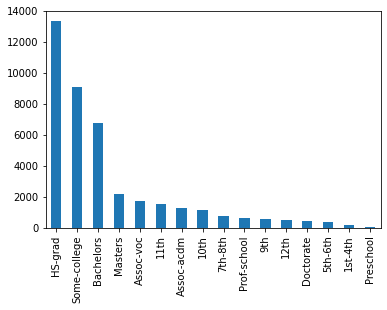

In [105]:
census_data['education'].value_counts().plot(kind='bar')

## Cross Tables (two-way tables)

In [106]:
pd.crosstab(census_data['education'], census_data['workclass'], margins=True, margins_name='Total')

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Total
education,,,,,,,,,,
10th,122,13,46,2,857,24,91,17,0,1172
11th,153,9,52,3,1200,18,94,13,0,1542
12th,45,8,21,0,424,9,27,8,0,542
1st-4th,16,1,3,0,158,2,14,2,0,196
5th-6th,36,1,11,0,336,7,27,2,0,420
7th-8th,93,4,33,1,519,17,116,12,2,797
9th,52,5,27,0,473,12,50,9,0,628
Assoc-acdm,57,72,102,0,890,49,96,57,2,1325
Assoc-voc,72,52,100,0,1253,52,143,62,0,1734


In [107]:
pd.crosstab(census_data['education'], census_data['workclass'], normalize=True).style.background_gradient(cmap='RdYlGn').set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
education,,,,,,,,,
10th,0.003,0.000,0.001,0.000,0.021,0.001,0.002,0.000,0.000
11th,0.004,0.000,0.001,0.000,0.029,0.000,0.002,0.000,0.000
12th,0.001,0.000,0.001,0.000,0.010,0.000,0.001,0.000,0.000
1st-4th,0.000,0.000,0.000,0.000,0.004,0.000,0.000,0.000,0.000
5th-6th,0.001,0.000,0.000,0.000,0.008,0.000,0.001,0.000,0.000
7th-8th,0.002,0.000,0.001,0.000,0.013,0.000,0.003,0.000,0.000
9th,0.001,0.000,0.001,0.000,0.012,0.000,0.001,0.000,0.000
Assoc-acdm,0.001,0.002,0.002,0.000,0.022,0.001,0.002,0.001,0.000
Assoc-voc,0.002,0.001,0.002,0.000,0.030,0.001,0.003,0.002,0.000


# Pivot Table

In [108]:
pd.pivot_table(data=census_data, index='education', columns='workclass', values='ID', aggfunc='count', margins=True, margins_name='Total')

workclass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,Total
education,,,,,,,,,,
10th,122,13,46,2,857,24,91,17,0,1172
11th,153,9,52,3,1200,18,94,13,0,1542
12th,45,8,21,0,424,9,27,8,0,542
1st-4th,16,1,3,0,158,2,14,2,0,196
5th-6th,36,1,11,0,336,7,27,2,0,420
7th-8th,93,4,33,1,519,17,116,12,2,797
9th,52,5,27,0,473,12,50,9,0,628
Assoc-acdm,57,72,102,0,890,49,96,57,2,1325
Assoc-voc,72,52,100,0,1253,52,143,62,0,1734


# 14. Some useful Data Frame operations

## Converting DataFrame to numpy.ndarray

In [109]:
# convert dataframe to numpy.ndarray
census_data.head().values

array([[1, 39, 'State-gov', 'Bachelors', 13, 'Never-married',
        'Adm-clerical', 'Not-in-family', 'White', 'Male', 2174.0, 0.0,
        40.0, 'United-States', '<=50K'],
       [2, 50, 'Self-emp-not-inc', 'Bachelors', 13, 'Married-civ-spouse',
        'Exec-managerial', 'Husband', 'White', 'Male', 0.0, 0.0, 13.0,
        'United-States', '<=50K'],
       [3, 38, 'Private', 'HS-grad', 9, 'Divorced', 'Handlers-cleaners',
        'Not-in-family', 'White', 'Male', 0.0, 0.0, 40.0,
        'United-States', '<=50K'],
       [4, 53, 'Private', '11th', 7, 'Married-civ-spouse',
        'Handlers-cleaners', 'Husband', 'Black', 'Male', 0.0, 0.0, 40.0,
        'United-States', '<=50K'],
       [5, 28, 'Private', 'Bachelors', 13, 'Married-civ-spouse',
        'Prof-specialty', 'Wife', 'Black', 'Female', 0.0, 0.0, 40.0,
        'Cuba', '<=50K']], dtype=object)

In [110]:
type(census_data.head().values)

numpy.ndarray

## Column Operations

### Min-Max Scaling

In [111]:
max_value = census_data['age'].max()
min_value = census_data['age'].min()

In [112]:
census_data['min_max_scaled_age'] = (census_data['age']-min_value)/(max_value-min_value)
census_data[['age', 'min_max_scaled_age']].sample(5)

,age,min_max_scaled_age
19369,40,0.315068
31365,21,0.054795
28105,35,0.246575
12716,62,0.616438
708,60,0.589041


In [113]:
census_data[['age', 'min_max_scaled_age']].describe()

,age,min_max_scaled_age
count,41094.000000,41094.000000
mean,38.669757,0.296846
std,13.748166,0.188331
min,17.000000,0.000000
25%,28.000000,0.150685
50%,37.000000,0.273973
75%,48.000000,0.424658
max,90.000000,1.000000


In [114]:
max_value = census_data['hours_per_week'].max()
min_value = census_data['hours_per_week'].min()
census_data['min_max_scaled_hours_per_week'] = (census_data['hours_per_week']-min_value)/(max_value-min_value)
census_data[['hours_per_week', 'min_max_scaled_hours_per_week']].sample(5)

,hours_per_week,min_max_scaled_hours_per_week
26730,40.0,0.397959
16047,55.0,0.551020
20381,40.0,0.397959
36775,40.0,0.397959
14477,40.0,0.397959


In [115]:
census_data[['hours_per_week', 'min_max_scaled_hours_per_week']].describe()

,hours_per_week,min_max_scaled_hours_per_week
count,41094.000000,41094.000000
mean,40.404583,0.402199
std,12.371206,0.126244
min,1.000000,0.000000
25%,40.000000,0.397959
50%,40.000000,0.397959
75%,45.000000,0.448980
max,99.000000,1.000000


In [116]:
max_value = census_data['education_num'].max()
min_value = census_data['education_num'].min()
census_data['min_max_scaled_education_num'] = (census_data['education_num']-min_value)/(max_value-min_value)
census_data[['education_num', 'min_max_scaled_education_num']].sample(5)

,education_num,min_max_scaled_education_num
21860,2,0.066667
28412,10,0.600000
38446,10,0.600000
17963,9,0.533333
28603,13,0.800000


In [117]:
census_data[['education_num', 'min_max_scaled_education_num']].describe()

,education_num,min_max_scaled_education_num
count,41094.000000,41094.000000
mean,10.079355,0.605290
std,2.560937,0.170729
min,1.000000,0.000000
25%,9.000000,0.533333
50%,10.000000,0.600000
75%,12.000000,0.733333
max,16.000000,1.000000


# 15. Save Processed File

In [118]:
# save as picke file (binary)
census_data.to_pickle('income_data_processed.pkl')

# Save as .csv
census_data.to_csv('income_data_processed.csv', index=False)

<hr>

# 16. Formulating ML Problem to Solve

In [119]:
# load pickle file
#census_data = pd.read_pickle('income_data_processed.pkl')

In [120]:
census_data.head()

,ID,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class,min_max_scaled_age,min_max_scaled_hours_per_week,min_max_scaled_education_num
0,1,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K,0.301370,0.397959,0.800000
1,2,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K,0.452055,0.122449,0.800000
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K,0.287671,0.397959,0.533333
3,4,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K,0.493151,0.397959,0.400000
4,5,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K,0.150685,0.397959,0.800000


## Identify Feature variables (X) and target variable (y)
* y = f(X)

In [121]:
census_data.columns

Index(['ID', 'age', 'workclass', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'min_max_scaled_age', 'min_max_scaled_hours_per_week',
       'min_max_scaled_education_num'],
      dtype='object')

In [122]:
X_columns = []
y_column =''

In [123]:
census_data['class'].unique()

array(['<=50K', '>50K'], dtype=object)

## Transform into Binary Column
* "<=50K" -> 0
* ">50K"  -> 1

In [124]:
census_data['y_act'] = np.where(census_data['class']=='>50K',1,0)

In [125]:
census_data[['class', 'y_act']].sample(5)

,class,y_act
35503,<=50K,0
37013,<=50K,0
15617,<=50K,0
31237,<=50K,0
2937,<=50K,0


In [126]:
# value counts 
census_data[['class', 'y_act']].value_counts()

class  y_act
<=50K  0        31297
>50K   1         9797
dtype: int64

In [127]:
# value counts as a ratio
census_data[['class', 'y_act']].value_counts(normalize=True)

class  y_act
<=50K  0        0.761595
>50K   1        0.238405
dtype: float64

# 17. Explore X Variables

In [128]:
#census_data[X_columns]

### X variables (features) against y variable (target)

In [129]:
census_data.groupby(by=['class', 'y_act']).agg({'age': ['min', 'max', 'mean', 'std']})

age                          
            min max       mean        std
class y_act                              
<=50K 0      17  90  36.921302  14.157086
>50K  1      19  90  44.255282  10.564443

In [130]:
census_data.groupby(by=['class', 'y_act']).agg({'hours_per_week': ['min', 'max', 'mean', 'std']})

hours_per_week                            
                       min   max       mean        std
class y_act                                           
<=50K 0                1.0  99.0  38.840721  12.348190
>50K  1                1.0  99.0  45.400429  11.053307

In [131]:
census_data.groupby(by=['class', 'y_act']).agg({'education_num': ['min', 'max', 'mean', 'std']})

education_num                         
                      min max       mean       std
class y_act                                       
<=50K 0                 1  16   9.604850  2.425699
>50K  1                 1  16  11.595182  2.386682

## Correlation matrix for numeric columns

In [132]:
correlation_matrix = census_data[['age',  'hours_per_week', 'education_num','y_act']].corr()
correlation_matrix

,age,hours_per_week,education_num,y_act
age,1.000000,0.072075,0.027157,0.227311
hours_per_week,0.072075,1.000000,0.141754,0.225930
education_num,0.027157,0.141754,1.000000,0.331170
y_act,0.227311,0.225930,0.331170,1.000000


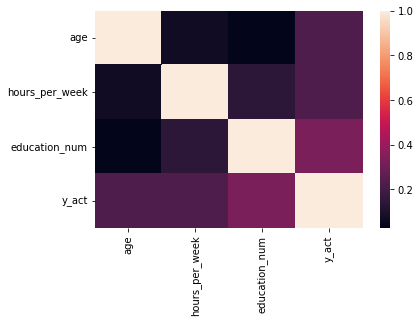

In [133]:
sns.heatmap(correlation_matrix)

# 18. Transform Continious Variable to Categorical Variable

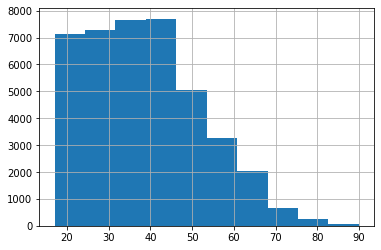

In [134]:
census_data['age'].hist()

In [135]:
census_data['age'].describe()

count    41094.000000
mean        38.669757
std         13.748166
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [136]:
# Use value_counts() get freqeuncy table after grouping into buackets
census_data['age'].value_counts(bins=10)

(38.9, 46.2]      7700
(31.6, 38.9]      7665
(24.3, 31.6]      7271
(16.926, 24.3]    7115
(46.2, 53.5]      5031
(53.5, 60.8]      3266
(60.8, 68.1]      2040
(68.1, 75.4]       668
(75.4, 82.7]       253
(82.7, 90.0]        85
Name: age, dtype: int64

In [137]:
census_data['age'].value_counts(bins=10, normalize=True)

(38.9, 46.2]      0.187375
(31.6, 38.9]      0.186524
(24.3, 31.6]      0.176936
(16.926, 24.3]    0.173140
(46.2, 53.5]      0.122427
(53.5, 60.8]      0.079476
(60.8, 68.1]      0.049642
(68.1, 75.4]      0.016255
(75.4, 82.7]      0.006157
(82.7, 90.0]      0.002068
Name: age, dtype: float64

## Use of `cut()` function to create buckets based on custome ranges 

In [138]:
labels = ['<20', '20-30', '30-40', '40-50', '50-60', '>60']
bin_edges = [0, 20, 30, 40, 50, 60, np.inf]

In [139]:
len(labels)

6

In [140]:
len(bin_edges)

7

In [141]:
# Create bucket variable
census_data['age_group'] = pd.cut(x=census_data['age'], bins=bin_edges, labels=labels)

In [142]:
census_data[['age', 'age_group']].sample(10)

,age,age_group
24285,41,40-50
1564,42,40-50
18470,30,20-30
3879,43,40-50
13235,23,20-30
2796,47,40-50
11768,40,30-40
36776,33,30-40
26189,39,30-40
17796,23,20-30


## Exercise 1
Convert `hours_per_week` into categorical variable 

In [143]:
census_data['hours_per_week'].describe()

count    41094.000000
mean        40.404583
std         12.371206
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [144]:
census_data['hours_per_week'].value_counts(bins=10)

(30.4, 40.2]     22441
(40.2, 50.0]      7481
(20.6, 30.4]      2869
(10.8, 20.6]      2801
(59.8, 69.6]      2239
(50.0, 59.8]      1307
(0.901, 10.8]      947
(69.6, 79.4]       569
(79.4, 89.2]       267
(89.2, 99.0]       173
Name: hours_per_week, dtype: int64

In [145]:
# Type your code here

## Analyze new variables using cross tables 

In [146]:
pd.crosstab(census_data['education'], census_data['age_group'], normalize=True).style.background_gradient(cmap='RdYlGn').set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


age_group,<20,20-30,30-40,40-50,50-60,>60
education,,,,,,
10th,0.006,0.006,0.005,0.004,0.005,0.003
11th,0.013,0.008,0.007,0.005,0.003,0.002
12th,0.004,0.003,0.003,0.001,0.001,0.001
1st-4th,0.000,0.001,0.001,0.001,0.001,0.001
5th-6th,0.000,0.002,0.002,0.002,0.002,0.001
7th-8th,0.001,0.002,0.003,0.004,0.004,0.005
9th,0.001,0.003,0.003,0.002,0.003,0.002
Assoc-acdm,0.000,0.009,0.011,0.008,0.003,0.001
Assoc-voc,0.000,0.012,0.014,0.010,0.004,0.002


In [147]:
pd.crosstab(census_data['age_group'], census_data['y_act'], normalize=True).style.background_gradient(cmap='RdYlGn').set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


y_act,0,1
age_group,,
<20,0.074,0.000
20-30,0.229,0.020
30-40,0.189,0.074
40-50,0.132,0.081
50-60,0.081,0.046
>60,0.057,0.017


In [148]:
pd.crosstab(census_data['education'], census_data['y_act'], normalize=True).style.background_gradient(cmap='RdYlGn').set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  """Entry point for launching an IPython kernel.


y_act,0,1
education,,
10th,0.027,0.002
11th,0.036,0.002
12th,0.012,0.001
1st-4th,0.005,0.000
5th-6th,0.010,0.001
7th-8th,0.018,0.001
9th,0.014,0.001
Assoc-acdm,0.024,0.008
Assoc-voc,0.032,0.011


# 19. Combine Values of Categorical Variables (Reduce Number of Categories)

In [149]:
census_data.education.unique()

['Bachelors', 'HS-grad', '11th', 'Masters', '9th', ..., '5th-6th', '10th', '1st-4th', 'Preschool', '12th']
Length: 16
Categories (16, object): ['10th', '11th', '12th', '1st-4th', ..., 'Masters', 'Preschool',
                          'Prof-school', 'Some-college']

In [150]:
census_data.education_num.unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int8)

In [151]:
census_data['education_group'] = None
census_data.loc[census_data['education']=='Preschool', 'education_group'] = 'school'
census_data.loc[census_data['education']=='5th-6th', 'education_group'] = 'school'
census_data.loc[census_data['education']=='1st-4th', 'education_group'] = 'school'
census_data.loc[census_data['education']=='7th-8th', 'education_group'] = 'school'
census_data.loc[census_data['education']=='9th', 'education_group'] = 'school'

census_data.loc[census_data['education']=='Some-college', 'education_group'] = 'university'
census_data.loc[census_data['education']=='Assoc-voc', 'education_group'] = 'university'
census_data.loc[census_data['education']=='Assoc-acdm', 'education_group'] = 'university'
census_data.loc[census_data['education']=='Doctorate', 'education_group'] = 'university'
census_data.loc[census_data['education']=='Prof-school', 'education_group'] = 'university'
census_data.loc[census_data['education']=='Bachelors', 'education_group'] = 'university'
#census_data.loc[census_data['education']=='HS-grad', 'education_group'] = 'university'
census_data.loc[census_data['education']=='Masters', 'education_group'] = 'university'

census_data.loc[census_data['education']=='10th', 'education_group'] = 'h. school'
census_data.loc[census_data['education']=='11th', 'education_group'] = 'h. school'
census_data.loc[census_data['education']=='12th', 'education_group'] = 'h. school'

In [152]:
census_data['education_group'].unique()

array(['university', None, 'h. school', 'school'], dtype=object)

In [153]:
census_data.loc[census_data['education_group'].isna()]

,ID,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,...,capital_loss,hours_per_week,native_country,class,min_max_scaled_age,min_max_scaled_hours_per_week,min_max_scaled_education_num,y_act,age_group,education_group
2,3,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,40.0,United-States,<=50K,0.287671,0.397959,0.533333,0,30-40,None
7,8,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,45.0,United-States,>50K,0.479452,0.448980,0.533333,1,50-60,None
16,17,25,Self-emp-not-inc,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,...,0.0,35.0,United-States,<=50K,0.109589,0.346939,0.533333,0,20-30,None
17,18,32,Private,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,...,0.0,40.0,United-States,<=50K,0.205479,0.397959,0.533333,0,30-40,None
21,22,54,Private,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,...,0.0,20.0,United-States,<=50K,0.506849,0.193878,0.533333,0,50-60,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41084,41085,48,Private,HS-grad,9,Married-civ-spouse,Adm-clerical,Husband,White,Male,...,0.0,40.0,United-States,<=50K,0.424658,0.397959,0.533333,0,40-50,None
41085,41086,61,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,...,0.0,48.0,United-States,<=50K,0.602740,0.479592,0.533333,0,>60,None
41086,41087,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,...,0.0,40.0,United-States,<=50K,0.191781,0.397959,0.533333,0,30-40,None
41087,41088,25,Private,HS-grad,9,Never-married,Other-service,Own-child,White,Female,...,0.0,40.0,United-States,<=50K,0.109589,0.397959,0.533333,0,20-30,None


In [154]:
pd.crosstab(census_data['education_group'], census_data['age_group'], margins=True, margins_name='Total')

age_group,<20,20-30,30-40,40-50,50-60,>60,Total
education_group,,,,,,,
h. school,947,654,621,397,373,264,3256
school,104,369,389,394,428,424,2108
university,1142,5973,6097,5308,2544,1321,22385
Total,2193,6996,7107,6099,3345,2009,27749


In [155]:
# Alternative: use replace
census_data['education_group'] = census_data['education'].replace('Preschool', 'school')

## Method 2: Apply Custom Functions over Data Frames

In [156]:
def merge_education_catergory(education):
  if education in ('Preschool', '1st-4th', '5th-6th', '7th-8th', '9th'):
    return 'school'
  elif education in ('10th', '11th', '12th'):
    return 'h. school'
  elif education in ('Bachelors', 'Masters', 'Some-college', 'Assoc-acdm', 'Assoc-voc', 'Doctorate', 'Prof-school', 'HS-grad'):
    return 'university'

print(f"merge_education_catergory('12th') = '{merge_education_catergory('12th')}'")
print(f"merge_education_catergory('Masters') = '{merge_education_catergory('Masters')}'")

merge_education_catergory('12th') = 'h. school'
merge_education_catergory('Masters') = 'university'


In [157]:
census_data['education_group2'] = census_data['education'].apply(merge_education_catergory)
pd.crosstab(census_data['education_group2'], census_data['age_group'], margins=True, margins_name='Total')

age_group,<20,20-30,30-40,40-50,50-60,>60,Total
education_group2,,,,,,,
h. school,947,654,621,397,373,264,3256
school,104,369,389,394,428,424,2108
university,1990,9203,9809,7950,4420,2358,35730
Total,3041,10226,10819,8741,5221,3046,41094


## Method 3: Use String Matching (RegEx)

In [158]:
census_data.loc[census_data['education'].str.match('(Preschool|1st-4th|5th-6th|7th-8th|9th)'), 'education_group3'] = 'school'
census_data.loc[census_data['education'].str.match('(10th|11th|12th|HS-grad)'), 'education_group3'] = 'h. school'
census_data.loc[census_data['education'].str.match('(Bachelors|Masters|Some-college|Assoc-acdm|Assoc-voc|Doctorate|Prof-school)'), 'education_group3'] = 'university'
pd.crosstab(census_data['education_group3'], census_data['age_group'], margins=True, margins_name='Total')

age_group,<20,20-30,30-40,40-50,50-60,>60,Total
education_group3,,,,,,,
h. school,1795,3884,4333,3039,2249,1301,16601
school,104,369,389,394,428,424,2108
university,1142,5973,6097,5308,2544,1321,22385
Total,3041,10226,10819,8741,5221,3046,41094


<hr>

# 20. Model Building Example

---



In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [160]:
census_data.columns

Index(['ID', 'age', 'workclass', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'class', 'min_max_scaled_age', 'min_max_scaled_hours_per_week',
       'min_max_scaled_education_num', 'y_act', 'age_group', 'education_group',
       'education_group2', 'education_group3'],
      dtype='object')

## Identify `X` and `y`

In [161]:
X_variables = ['age',  'hours_per_week', 'education_num']
census_data[X_variables].head()

,age,hours_per_week,education_num
0,39,40.0,13
1,50,13.0,13
2,38,40.0,9
3,53,40.0,7
4,28,40.0,13


In [162]:
y_varibale = 'y_act'
census_data[y_varibale].head()

0    0
1    0
2    0
3    0
4    0
Name: y_act, dtype: int64

In [163]:
# Two classes
census_data[y_varibale].unique()

array([0, 1])

In [164]:
X = census_data[X_variables].values
X

array([[39., 40., 13.],
       [50., 13., 13.],
       [38., 40.,  9.],
       ...,
       [38., 50., 13.],
       [44., 40., 13.],
       [35., 60., 13.]], dtype=float32)

In [165]:
y = census_data[y_varibale].values
y

array([0, 0, 0, ..., 0, 0, 1])

## Train Test Split

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(F"Train sample size = {len(X_train)}")
print(F"Test sample size  = {len(X_test)}")

Train sample size = 28765
Test sample size  = 12329


## Create Logistic Regression Model
* https://en.wikipedia.org/wiki/Logistic_regression
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [167]:
model = LogisticRegression()

## Fit Model

In [168]:
model.fit(X_train, y_train)

LogisticRegression()

## Predict

In [169]:
model.predict_proba(X_test)

array([[0.90013482, 0.09986518],
       [0.8582601 , 0.1417399 ],
       [0.90162755, 0.09837245],
       ...,
       [0.8574348 , 0.1425652 ],
       [0.71848823, 0.28151177],
       [0.62317128, 0.37682872]])

## Predicted Probability for Class 1

In [170]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred_prob

array([0.09986518, 0.1417399 , 0.09837245, ..., 0.1425652 , 0.28151177,
       0.37682872])

In [171]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Create Results Data Frame for Test Sample

In [172]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(10)

,y_act,y_pred,y_pred_prob
3893,1,0,0.232203
10795,0,0,0.215231
5322,1,0,0.324349
3368,0,0,0.138849
11840,0,0,0.270196
11912,1,0,0.326928
4347,1,1,0.898325
8759,1,1,0.666546
6183,1,0,0.494507
3075,0,0,0.138262


## Confusion Matrix

In [173]:
cm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cm

y_pred,0,1,All
y_act,,,
0,8832,555,9387
1,2023,919,2942
All,10855,1474,12329


In [174]:
acuracy = (cm.loc[0,0] + cm.loc[1,1] ) / cm.loc['All','All'] 
acuracy

0.7908995052315678

# Create Random Forest CLassifier
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [175]:
from sklearn.ensemble import RandomForestClassifier

In [176]:
model = RandomForestClassifier(n_estimators=1000)

In [177]:
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [178]:
model.predict_proba(X_test)

array([[0.85203298, 0.14796702],
       [0.85831613, 0.14168387],
       [0.98600373, 0.01399627],
       ...,
       [0.93164565, 0.06835435],
       [0.49988412, 0.50011588],
       [0.32675706, 0.67324294]])

In [179]:
y_pred = model.predict(X_test)

In [180]:
test_result = pd.DataFrame(data={'y_act':y_test, 'y_pred':y_pred, 'y_pred_prob':y_pred_prob})
test_result.sample(10)

,y_act,y_pred,y_pred_prob
504,0,0,0.150946
2415,0,0,0.081287
8275,1,1,0.623479
8614,0,0,0.122125
10836,0,0,0.302751
7343,0,0,0.156838
1302,0,0,0.152172
2700,0,0,0.081287
9117,1,0,0.050252
4011,0,0,0.184802


In [181]:
cm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cm

y_pred,0,1,All
y_act,,,
0,8541,846,9387
1,1858,1084,2942
All,10399,1930,12329


In [182]:
acuracy = (cm.loc[0,0] + cm.loc[1,1] ) / cm.loc['All','All'] 
acuracy

0.7806796982723659

<hr>
Last update 2022-03-03 by Sumudu Tennakoon

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.